# Анализ данных сервиса аренды самокатов GoFast.

В вашем распоряжении данные сервиса аренды самокатов GoFast. Нам предоставленны данные о пользователях сервиса аренды самокатов из нескольких городов, а также информация об их поездках. Кроме того, у нас есть файл рассказывающий о двух видах использования сервиса: с подпиской и без. Подписка стоит 199 рублей в месяц, за это пользователь получает бесплатный старт и 6 рублей за минуту поездки. Без подписки пользователю придется заплатить за старт поездки 50 рублей и 8 рубдей за каждую потраченную на поездку минуту. 

Цель нашего проекта проанализировать данные о пользователях сервиса аренды самокатов и о их поездках для того чтобы выявить есть ли влияние подписки на длительность поездки. Более того, в нашем проекте будут проверены гипотезы, которые помогут улучшить сервис аренды самокатов. (Пользователи с подпиской больше времени на поездки; Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров; Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.)

Наша работа будет состоять из 7 шагов:
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Вывод

В итоге работы мы получим информацию о том, влияет ли подписка на длину поездки или нет. Также мы подтвердим или опровергнем наши гипотезы. 

In [1]:
#Импортируем все необходимые библиотеки и откроем файл.
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
#Просмотрим все датасеты, которые у нас есть.
try:
    users = pd.read_csv('users_go (1).csv', sep=',')
    rides = pd.read_csv('rides_go (1).csv', sep=',')
    subscriptions = pd.read_csv('subscriptions_go (1).csv', sep=',')
except:
    users = pd.read_csv('/datasets/users_go (1).csv', sep=',')
    rides = pd.read_csv('/datasets/rides_go (1).csv', sep=',')
    subscriptions = pd.read_csv('/datasets/subscriptions_go (1).csv', sep=',')

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В файле users мы можем посмотреть количество пользователей, которые берут в прокат самокаты. В нём также находится информация об уникальном ID пользователя, его имени, возраста, городе и типе подписке. 

В таблице 1565 строк с данными о пользователях приложения. Столбцы названы корректно, тип данных также соответствующий. 

In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В файле rides мы можем посмотреть количество пользователей, которые берут в прокат самокаты. По этому файлу мы можем посмотреть какое количество времени и сколько километров длилась каждая поездка пользователя, а также дату поездки. Для того чтобы понять к какому пользователю относится так или иная поездка, там нужно обратить внимение на ID пользователя. 

В таблице 18068 строк с данными о каждой из поездок пользователей. Столбцы названы корректно. Данные в столбце distance и duration позже приведем к целочисленным для коректных расчетов. Также данные в столбце date преобразуем к формату даты pandas.


In [7]:
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В файле subscriptions мы можем посмотреть как подписка влияет на стоимость аренды самоката, в этом файле указано два типа подписки, стоимость одной минуты поездки по каждой подписке, стоимость начала поездки и стоимость ежемесячного платежа для каждой из подписок. 

В таблице 2 строки с данными о видах подписки. Столбцы названы корректно, тип данных также соответствующий. 

#### Шаг 2. Предобработка данных

In [9]:
#Приведем столбец date к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [10]:
#Добавим столбец в котором указан месяц публикации объявления.
rides['month'] = rides['date'].dt.month

In [11]:
rides['date'].describe()

count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

Судя по данной информации, нам предоставили данные за полный 2021 год. 

In [12]:
#Проверим дайл users на наличие пропусков 
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
#Проверим дайл rides на наличие пропусков 
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
#Проверим дайл subscriptions на наличие пропусков 
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [15]:
#Проверим дайл users на наличие дубликатов 
users.duplicated().sum()

31

In [16]:
#Проверим дайл rides на наличие дубликатов 
rides.duplicated().sum()

0

In [17]:
#Проверим дайл subscriptions на наличие дубликатов 
subscriptions.duplicated().sum()

0

Проверка данных на дубликаты показала, что в файле users 31 дубликат. Рассмотрим их более детально. 

In [18]:
users.value_counts().head(31)

user_id  name        age  city            subscription_type
209      Андрей      23   Омск            ultra                2
807      Александр   28   Екатеринбург    free                 2
611      Владимир    28   Омск            ultra                2
43       Стефания    22   Омск            ultra                2
737      Мелания     27   Ростов-на-Дону  free                 2
47       Юрий        28   Тюмень          ultra                2
1198     Демид       29   Ростов-на-Дону  free                 2
829      Федор       29   Пятигорск       free                 2
924      Мария       23   Пятигорск       free                 2
153      Герман      23   Москва          ultra                2
635      Герман      21   Москва          ultra                2
72       Никита      25   Москва          ultra                2
909      Константин  20   Екатеринбург    free                 2
908      Рустам      30   Тюмень          free                 2
136      Марсель     25   Тюме

In [19]:
#Удалим дубликаты методом drop_duplicates и сделаем проверку. 
users = users.drop_duplicates()
users.duplicated().sum()

0

В результате проделанной предобработки данных, мы удалили 31 дубликат в файле users, привели столбец date в файле rides к типу даты pandas, также узнали за какой период нам предоставленны данные (за полный 2021 год).

#### Шаг 3. Исследовательский анализ данных

In [20]:
#Посмотрим какие города наиболее часто встречаются среди пользователей. 
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

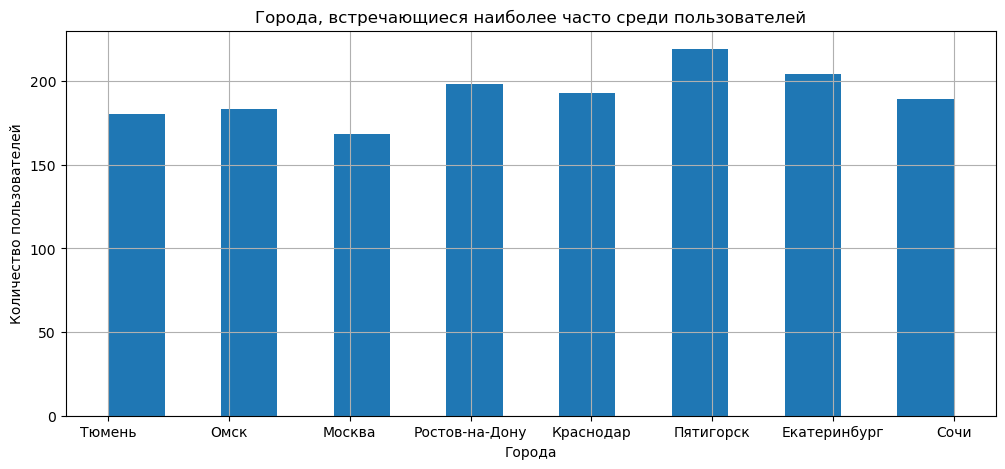

In [21]:
#Построим график, который поможет нам правильно визуализировать данные. 
users['city'].hist(bins=15, figsize=(12,5)) 
plt.title("Города, встречающиеся наиболее часто среди пользователей")
plt.xlabel("Города")
plt.ylabel("Количество пользователей")
plt.show()

Наиболее популярные города для аренды самоката - Пятигорск, Екатеринбург и Ростов-на-Дону. Возможно в этих городах у сервиса аренды самокатов GoFast больше всего самокатов, поэтому и поездок там больше. 

In [22]:
#Проанализируем соотношение пользователей с подпиской и без подписки.
have_subscription = (users['subscription_type'] == 'ultra').sum()/users['subscription_type'].count()
not_have_subscription = (users['subscription_type'] == 'free').sum()/users['subscription_type'].count()
print('Доля людей с подпиской:', have_subscription)
print('Доля людей без подписки:', not_have_subscription)

Доля людей с подпиской: 0.4556714471968709
Доля людей без подписки: 0.5443285528031291


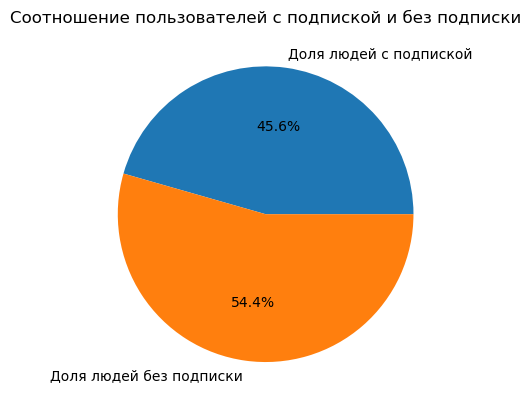

In [23]:
vals = [have_subscription, not_have_subscription]
labels = ["Доля людей с подпиской", "Доля людей без подписки"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Соотношение пользователей с подпиской и без подписки")
plt.show()

Пользователей, которые использует приложение без подписки больше на 9%, чем тех, кто использует с пропиской. 

In [24]:
#Изучим возраст пользователей.
users['age'].value_counts()

25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

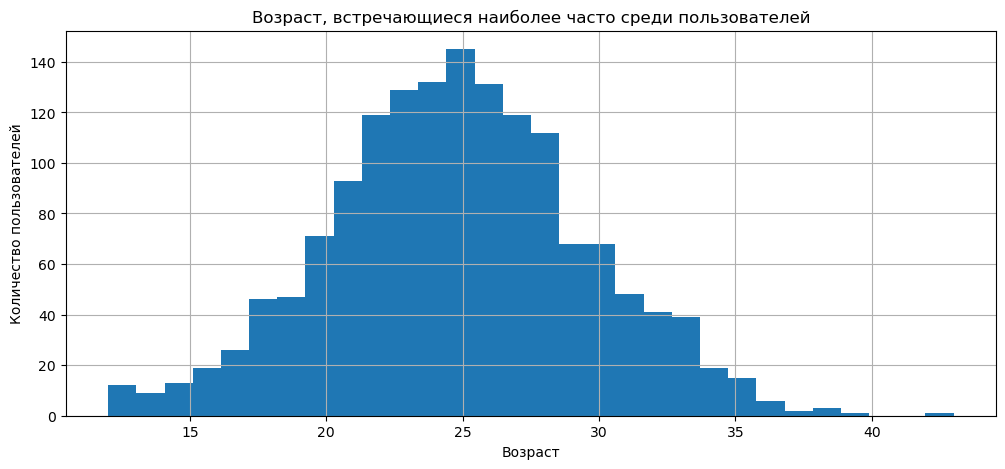

In [25]:
#Построим график, который поможет нам правильно визуализировать данные. 
users['age'].hist(bins=30, figsize=(12,5))
plt.title("Возраст, встречающиеся наиболее часто среди пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.show()

Наиболее распространённый возраст пользователей приложения составляет 25 лет. Большенство пользователей находяться в возрасте от 21 до 29 лет. Самому младшему пользователю 12 лет, а старшему 43 года. 

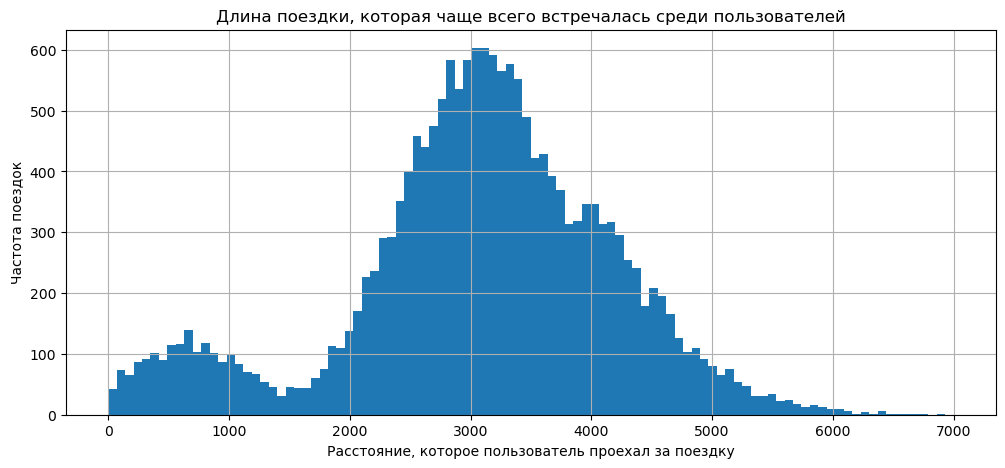

In [26]:
# Проанализируем расстояние, которое пользователь преодолел за одну поездку
rides['distance'].hist(bins=100, figsize=(12,5), range=(0,7000)) 
plt.title("Длина поездки, которая чаще всего встречалась среди пользователей")
plt.xlabel("Расстояние, которое пользователь проехал за поездку")
plt.ylabel("Частота поездок")
plt.show()

На графике видно два пиковых значения: на растоянии в 700 метров и 3000 метров. Возможно это связанно с оплатой поездки. В некоторых сервисах аренды самоката пользователь платит за старт поездки и за первые 5 минут поездки. Возможно для того чтобы не платить поминутные поездки люди берут самокат на 5 минут и как раз этого хватает чтобы проехать небольшое растояние до 1 км. тогда это объясняет пиковое значение в 700 метров. Второй пик можно объяснить тем, что люди чаще всего берут самокат на среднее растояние, а на более длинную поездку предпочитают иные виды транспорта (такси, автобус или метро). 

In [27]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

В среднем пользователи проезжают три километра за одну поездку. Минимальное растояние поездки составляет менее метра, возможно это связанно с тем, что люди нечеянно начинаю поездку и сразу ее заканчивают. Максимальное растояние поездки составляет 7,2 км. 

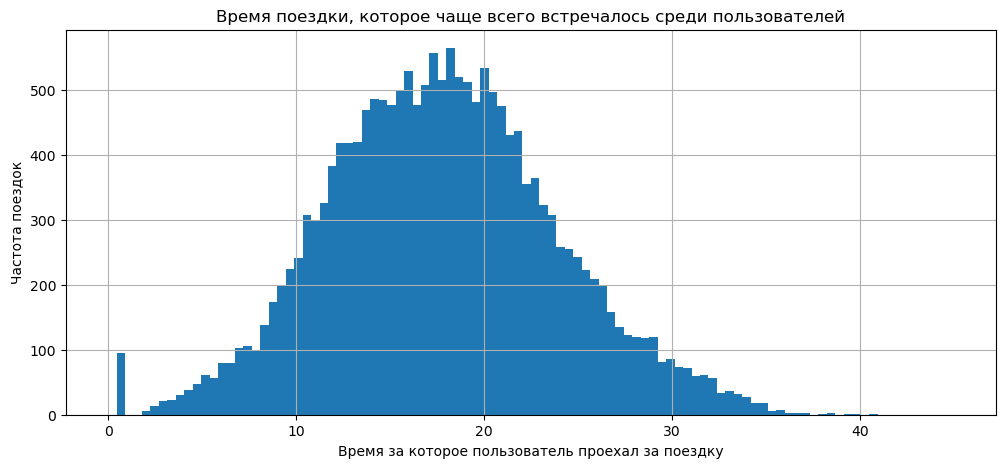

In [28]:
#Посмотрим продолжительность поездок.
rides['duration'].hist(bins=100, figsize=(12,5), range=(0,45)) 
plt.title("Время поездки, которое чаще всего встречалось среди пользователей")
plt.xlabel("Время за которое пользователь проехал за поездку")
plt.ylabel("Частота поездок")
plt.show()

На графике есть необычный пик около 0.5 минут. Скорее всего это аномалия и нам следует расмотреть такие поездки более детально.

In [29]:
rides[rides['duration'] < 1 ]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [30]:
rides[rides['duration'] < 1].describe()

,user_id,distance,duration,month
count,95.000000,95.000000,95.0,95.000000
mean,1092.210526,5113.176549,0.5,6.484211
std,244.028551,658.254104,0.0,3.709858
min,701.000000,4030.308008,0.5,1.000000
25%,901.000000,4611.510820,0.5,3.000000
50%,1069.000000,5052.769411,0.5,6.000000
75%,1310.500000,5488.459099,0.5,10.000000
max,1524.000000,7211.007745,0.5,12.000000


Расстояние которое люди приодолели за пол минуты согласно данным равно около 5100 метров. Скорее всего это техническая ошибка. Нам следует удалить данные аномалии для более граммотного анализа и чистой статистики. Кроме того следует передать данную информацию коллегам, которые занимаются техническими ошибками, для того чтобы устанить данные аномалии в дальнейшей статистики. 

In [31]:
rides = rides[rides.duration > 1] 

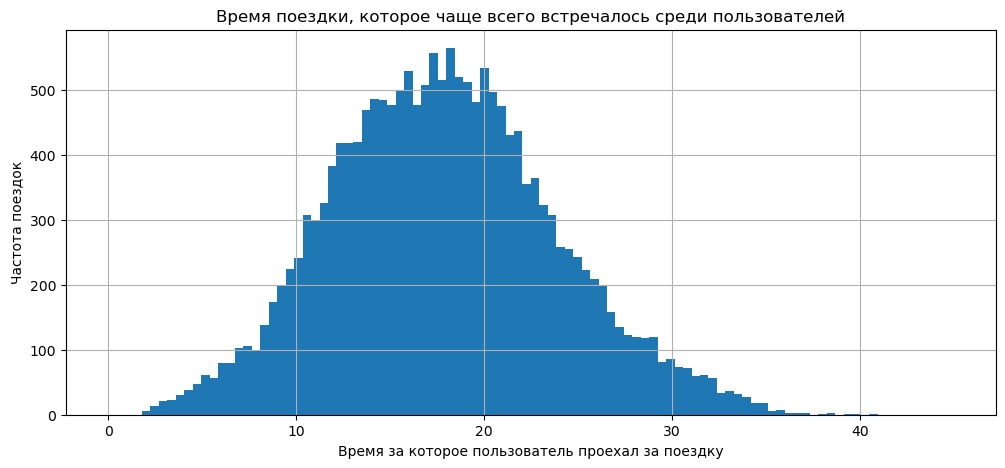

In [32]:
rides['duration'].hist(bins=100, figsize=(12,5), range=(0,45)) 
plt.title("Время поездки, которое чаще всего встречалось среди пользователей")
plt.xlabel("Время за которое пользователь проехал за поездку")
plt.ylabel("Частота поездок")
plt.show()

In [33]:
rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

Среднее время поездки составляет 17,8 минут. Самая короткая поездка длилась пол минуты. Самая долгая поездка была 40 минутная. 

После удаления аномалий изменилось время самой короткой поездки, она длилась 2 минуты. Самая долгая поездка была 40 минутная. Среднее время поездки составляет 17,8 минут.

Усредненный портрет пользователя и его поездки:
1. Скорее всего пользователь из Пятигорска, Екатеренбурга или Ростова-на-Дону
2. Есть больше вероятности, что пользователь без подписки. 
3. Средний возраст пользователя 25 лет. 
4. Растояние и время средней поездки составляет 3 км и 17,8 минут. 

#### Шаг 4. Объединение данных

In [34]:
#Объединим данные о пользователях, поездках и подписках в один датафрейм. 
data = users.merge(rides, on='user_id')
data = data.merge(subscriptions, on='subscription_type')
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [35]:
#Сравним количество строк до объединения и после 
entries = len(rides) - len(data)
entries

0

Количество строк полученной таблицы совпадает с количеством строк таблиц до объединения. После объединения данных мы ничего не потеряли. 

In [36]:
#Создадим датафрейм с данными о пользователях без подписки.
data_without_subscription = data.query("subscription_type.isin(['free'])")
data_without_subscription.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [37]:
#Создадим датафрейм с данными о пользователях с подпиской.
data_with_subscription = data.query("subscription_type.isin(['ultra'])")
data_with_subscription.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


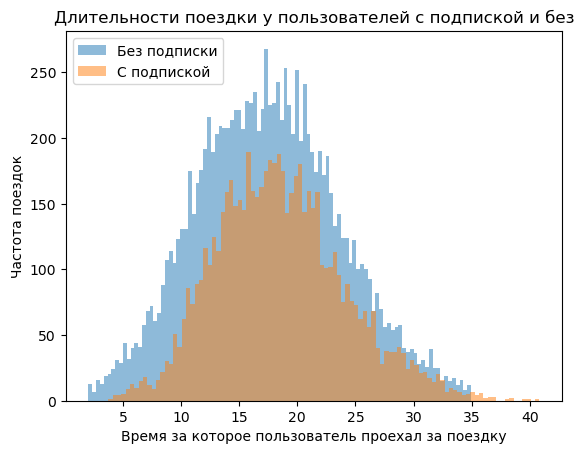

In [38]:
#Построим график с двумя гистограмамми по длительности поездки у пользователей с подпиской и без. 
plt.hist(data_without_subscription['duration'], bins=100 , alpha = 0.5, label='Без подписки')
plt.hist(data_with_subscription['duration'], bins=100, alpha = 0.5, label='С подпиской')
plt.legend(loc='upper left')
plt.title("Длительности поездки у пользователей с подпиской и без")
plt.xlabel("Время за которое пользователь проехал за поездку")
plt.ylabel("Частота поездок")

plt.show()

Судя по графику пользователи с подпиской и без подписки тратят примерно одинаковое время на поездку. У людей с подпиской есть тенденция тратить на поездку от 5 минут. Люди не имеющие подписку бывают ошибочно берут самокат, поэтому у них есть небольшая доля заказов, которые длятся менее 5 минут. 

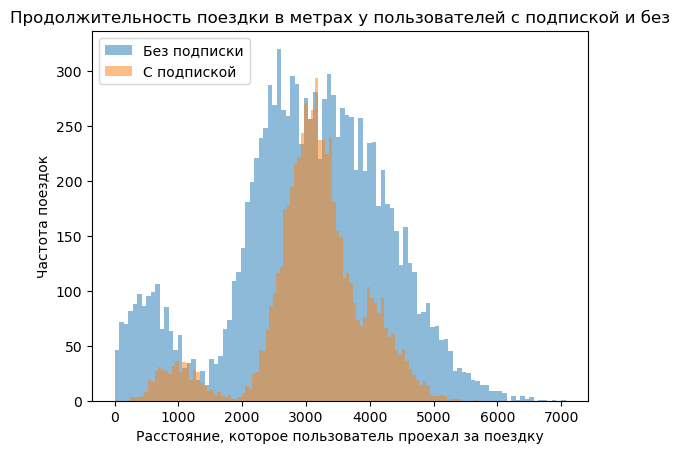

In [39]:
#Построим график с двумя гистограмамми по продолжительности поездки в метрах у пользователей с подпиской и без. 
plt.hist(data_without_subscription['distance'], bins=100 , alpha = 0.5, label='Без подписки')
plt.hist(data_with_subscription['distance'], bins=100, alpha = 0.5, label='С подпиской')
plt.legend(loc='upper left')
plt.title("Продолжительность поездки в метрах у пользователей с подпиской и без")
plt.xlabel("Расстояние, которое пользователь проехал за поездку")
plt.ylabel("Частота поездок")

plt.show()

Как мы видим по графику в основном люди с подпиской проезжают за поездку от 2 до 5 км. У людей без подписки разброс данных возрастает от 1 до 6 км. 

Насколько видно из графиков подписка не увеличивает среднее время и растояние поездки. 

#### Шаг 5. Подсчёт выручки

In [40]:
#Округлим продолжительность и длинну каждой поездки.
data['duration'] = np.ceil(data['duration'])
data['distance'] = np.ceil(data['distance'])

In [41]:
#Посчитаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
total_data = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values=['distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'],
                           aggfunc = {'distance': sum,
                                     'duration': sum,
                                     'name': len,
                                     'subscription_type': min,
                                     'minute_price': min,
                                     'start_ride_price': min,
                                     'subscription_fee': min,})
total_data.rename(columns = {'name' : 'total_rides'}, inplace = True)
total_data.sort_values(by='month')

distance  duration  minute_price  total_rides  \
month user_id                                                  
1     1          7028.0      42.0             6            2   
      1059      11981.0      74.0             8            3   
      1061      12638.0      43.0             8            3   
      1063       3277.0      10.0             8            1   
      1064       5298.0      15.0             8            1   
...                 ...       ...           ...          ...   
12    615        4339.0      13.0             6            1   
      616        5999.0      35.0             6            2   
      618        5270.0      33.0             6            2   
      597        3754.0      26.0             6            1   
      1534       2372.0      16.0             8            1   

               start_ride_price  subscription_fee subscription_type  
month user_id                                                        
1     1                       0               199             ultra  
      1059                   50                 0              free  
      1061                   50                 0              free  
      1063                   50                 0              free  
      1064                   50                 0              free  
...                         ...               ...               ...  
12    615                     0               199             ultra  
      616                     0               199             ultra  
      618                     0               199             ultra  
      597                     0               199             ultra  
      1534                   50                 0              free  

[11300 rows x 7 columns]

Теперь мы можем посмотреть какое количество поездок совершил пользователь в разбивке по месяцам. 

In [42]:
#Заменим данные в столбце duration на целочисленные.
total_data['duration'] = total_data['duration'].astype('int')
#Добавим столбец с помесячной выручкой, которую принёс каждый пользователь
total_data['total_price'] = (total_data['total_rides'] * total_data['start_ride_price']) + (total_data['duration'] * total_data['minute_price']) + total_data['subscription_fee']

total_data

distance  duration  minute_price  total_rides  \
month user_id                                                  
1     1          7028.0        42             6            2   
      3          3062.0        13             6            1   
      5          3915.0        13             6            1   
      7          6479.0        28             6            2   
      12         3578.0        33             6            1   
...                 ...       ...           ...          ...   
12    1525       4598.0        34             8            1   
      1526       3645.0        23             8            1   
      1528       3999.0        11             8            1   
      1532       6113.0        42             8            2   
      1534       2372.0        16             8            1   

               start_ride_price  subscription_fee subscription_type  \
month user_id                                                         
1     1                       0               199             ultra   
      3                       0               199             ultra   
      5                       0               199             ultra   
      7                       0               199             ultra   
      12                      0               199             ultra   
...                         ...               ...               ...   
12    1525                   50                 0              free   
      1526                   50                 0              free   
      1528                   50                 0              free   
      1532                   50                 0              free   
      1534                   50                 0              free   

               total_price  
month user_id               
1     1                451  
      3                277  
      5                277  
      7                367  
      12               397  
...                    ...  
12    1525             322  
      1526             234  
      1528             138  
      1532             436  
      1534             178  

[11300 rows x 8 columns]

In [43]:
total_data['total_price'].describe()

count    11300.000000
mean       342.754956
std        153.317314
min         74.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: total_price, dtype: float64

В среднем пользователи тратят около 340 рублей в месяц. Наибольшая сумма потраченная в сервисе аренды за месяц составляет 1444 рубля. 

#### Шаг 6. Проверка гипотез

##### Гипотеза №1
Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: Средняя длительность поездки пользователей с подпиской не отличается от средней длительности поездки пользователей без подписки.

Альтернативная гипотеза: Средняя длительность поездки пользователей с подпиской больше средней длительности поездки пользователей без подписки.

In [44]:
duration_ultra_mean = data_with_subscription['duration'].mean()
duration_free_mean = data_without_subscription['duration'].mean()
print('Среднее время у Пользователей с подпиской: ', duration_ultra_mean)
print('Среднее время у Пользователей без подписки: ', duration_free_mean)
    
alpha = 0.05

result = st.ttest_ind(data_without_subscription['duration'], data_with_subscription['duration'], alternative='less')

print('p-значение =', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотеву')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Среднее время у Пользователей с подпиской:  18.54198516280583
Среднее время у Пользователей без подписки:  17.530771268800226
p-значение = 4.704468074453899e-28
Отвергаем нулевую гипотеву


Подписка увеличивает среднее время на поездку. Кроме того, это подтверждает и средние значения продолжительности поездок для каждой категории пользователей. 

##### Гипотеза №2
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

Гипотеза 0: Среднее растояние, которое проезжают пользователи с подпиской равно 3130 метров.

Гипотеза 1: Среднее растояние пользователей с подпиской больше 3130 метров.

In [45]:
alpha = 0.05

good_distance = 3130
result = st.ttest_1samp(data_with_subscription['distance'], good_distance, alternative='greater')

print('p-значение =', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотеву')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение = 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Среднее растояние пользователей с подпиской не превышает 3130 метров.

##### Гипотеза №3
Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза 0: Средняя помесячная выручка от пользователей с подпиской не отличается от средней помесячной выручки пользователей без подписки.

Гипотеза 1: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка пользователей без подписки. 

In [46]:
#Разделим таблицу total_data на пользователей с подпиской и без.
data_with_subscription_full = total_data[total_data['subscription_type'] == 'ultra']
data_without_subscription_full = total_data[total_data['subscription_type'] == 'free']

#Посчитаем среднне значения выручки для пользователей с подпиской и без.
print('Средняя сумма пользователей с подпиской:', data_with_subscription_full['total_price'].mean().round())
print('Средняя сумма пользователей без подписки:', data_without_subscription_full ['total_price'].mean().round())

alpha = 0.05

result = st.ttest_ind(data_with_subscription_full['total_price'], data_without_subscription_full['total_price'], alternative='greater')

print('p-значение =', result.pvalue)
if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотеву')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Средняя сумма пользователей с подпиской: 363.0
Средняя сумма пользователей без подписки: 329.0
p-значение = 2.0314113674863288e-30
Отвергаем нулевую гипотеву


Помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки.

##### Гипотеза № 4
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотизы мы используем t-тест. 
Для этого нам нужно применить метод scipy.stats.ttest_rel()

Гипотеза 0: Количество обращений в техподдержку после сервисного обслуживания не изменилось. 

Гипотеза 1: Количество обращений в техподдержку уменьшилось после сервисного обслуживания, чем до. 

Выборки являются зависимыми, поэтому применим метод scipy.stats.ttest_rel().

#### Шаг 7. Распределения

#### Вывод

Во время работы над проектом, мы проанализировали и предобработали все имеющиеся у нас данные. Удалили явные дубликаты в файле users.

В ходе анализа данных, мы пришли к выводу, что самые поплуярные города для аренды самокатов - это Пятигорск, Екатеренбург и Ростов-на-Дону. Чуть меньше половины всех пользователей используют подписку на сервис. Средний возраст пользователя - 25 лет. Растояние и время средней поездки составляет 3 км и 17,8 минут. 

Далее мы соединили все файлы с данными и построили графики для того чтобы сравнить вреям и растояние которое люди тратят на поездку с подпиской и без. Судя по графикам, мы пришли к выводу, что подписка не увеличивает среднее время и растояние поездки.
Также мы расчитали, что в среднем пользователи тратят около 340 рублей в месяц. Наибольшая сумма потраченная в сервисе аренды за месяц составляет 1444 рубля.

В ходе работы также были проверены 3 гипотезы, такие выводы мы получили:

1. Подписка увеличивает среднее время на поездку.

2. Среднее растояние пользователей с подпиской не превышает 3130 метров.

3. Помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки.
